In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## PLOTLY
import plotly
import plotly.plotly as py
import plotly.graph_objs as go

## OTHERS
import json
from textwrap import dedent as d
import random
from collections import deque as de
import sqlite3
import pandas as pd
import time
from datetime import datetime
from config import plotly_username, plotly_api_key

In [2]:
plotly.tools.set_credentials_file(username=plotly_username, api_key=plotly_api_key)

In [3]:
# Use pandas to convert database data to dataframe
# Load database into dataframe by passing the SQL query and the connection object
# Include search subject for analysis
# Limit number of tweets return, sort to get newest tweets
conn = sqlite3.connect("PoliticsPredicted6.db")
c = conn.cursor()

In [4]:
df = pd.read_sql("SELECT * FROM TwitterDB WHERE tweet LIKE '%Trump%' ORDER BY unix DESC LIMIT 2000", conn)

In [5]:
# Use moving average to assess sentiment rating
# Order data chronologically before analyzing
df.sort_values(by=['unix'], inplace=True)
df.head()

,unix,tweet,sentiment
1999,1.551075e+12,RT @RealJack: BREAKING: Former Staff Members O...,-0.7351
1998,1.551075e+12,RT @Thomas1774Paine: Trump Is the Most 'Progre...,0.0000
1997,1.551075e+12,@realDonaldTrump I do need your help sir Mr. P...,0.4019
1996,1.551075e+12,"RT @HuffPost: George Conway, the husband of to...",0.2023
1995,1.551075e+12,@ltnldy805 @realDonaldTrump https://t.co/9i2oE...,0.0000


In [6]:
# Convert linux timestamp to more readable date format
# ms stands for miliseconds
df['unix'] = pd.to_datetime(df['unix'], unit='ms')
df.set_index('unix', inplace=True)
df.head()

,tweet,sentiment
unix,,
2019-02-25 06:07:13.848,RT @RealJack: BREAKING: Former Staff Members O...,-0.7351
2019-02-25 06:07:14.076,RT @Thomas1774Paine: Trump Is the Most 'Progre...,0.0000
2019-02-25 06:07:14.189,@realDonaldTrump I do need your help sir Mr. P...,0.4019
2019-02-25 06:07:14.574,"RT @HuffPost: George Conway, the husband of to...",0.2023
2019-02-25 06:07:14.645,@ltnldy805 @realDonaldTrump https://t.co/9i2oE...,0.0000


In [16]:
# Including shift allows calculation to use n number of rows for MA
# Without shift, if n = 5, 5th row will calculate MA using rows 1-4
# With shift, if n = 5, 6th row will calculate MA using rows 1-5
df['sentiment_ma_100'] = df.sentiment.rolling(100).mean().shift()
df['sentiment_ma_1000'] = df.sentiment.rolling(1000).mean().shift()
df.head(2000)

,tweet,sentiment,sentiment_ma_A,sentiment_ma_B,change,sentiment_ma_100,sentiment_ma_1000
unix,,,,,,,
2019-02-25 06:07:13.848,RT @RealJack: BREAKING: Former Staff Members O...,-0.7351,NaN,NaN,NaN,NaN,NaN
2019-02-25 06:07:14.076,RT @Thomas1774Paine: Trump Is the Most 'Progre...,0.0000,NaN,NaN,-inf,NaN,NaN
2019-02-25 06:07:14.189,@realDonaldTrump I do need your help sir Mr. P...,0.4019,NaN,NaN,inf,NaN,NaN
2019-02-25 06:07:14.574,"RT @HuffPost: George Conway, the husband of to...",0.2023,NaN,NaN,-0.686452,NaN,NaN
2019-02-25 06:07:14.645,@ltnldy805 @realDonaldTrump https://t.co/9i2oE...,0.0000,NaN,NaN,-inf,NaN,NaN
2019-02-25 06:07:14.726,RT @MarkSimoneNY: Remember when Spike Lee love...,0.7964,NaN,NaN,inf,NaN,NaN
2019-02-25 06:07:15.162,@realDonaldTrump @KatiePavlich Wow. As a subur...,0.0000,NaN,NaN,-inf,NaN,NaN
2019-02-25 06:07:15.166,RT @WalshFreedom: A question that should bothe...,-0.3400,NaN,NaN,NaN,NaN,NaN
2019-02-25 06:07:15.450,@sylvialpittman @ananavarro @realDonaldTrump H...,0.0000,NaN,NaN,-inf,NaN,NaN


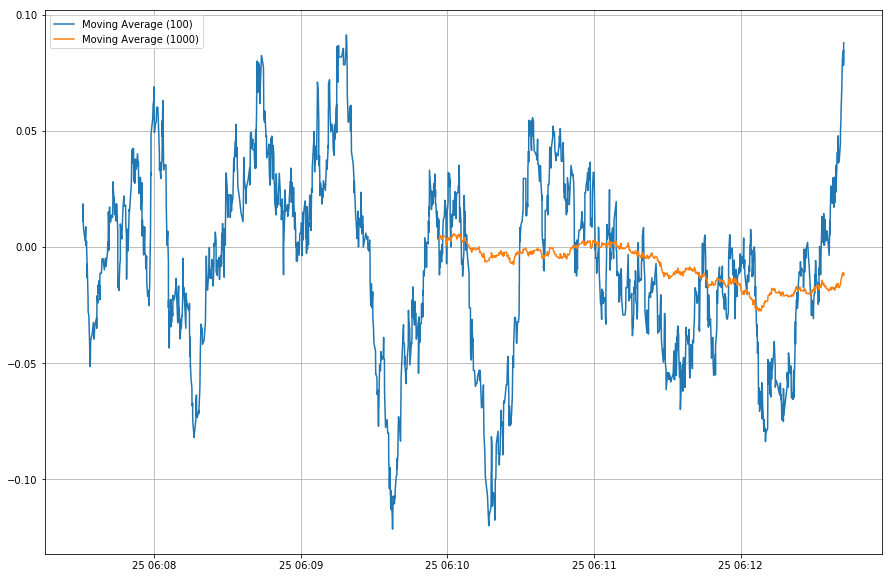

In [13]:
plt.figure(figsize=(15,10))
plt.grid(True)
# plt.plot(df['sentiment'], label='Sentiment')
plt.plot(df['sentiment_ma_100'], label='Moving Average (100)')
plt.plot(df['sentiment_ma_1000'], label='Moving Average (1000)')
plt.legend(loc=2)

In [9]:
# Compute log change
df['change'] = np.log(df['sentiment'] / df['sentiment'].shift())

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning:

divide by zero encountered in log

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning:

invalid value encountered in log



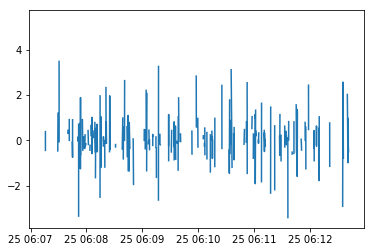

In [10]:
plt.plot(df.change)